# Final Exam PHYS248/MATH248
**Saturday April 14th, 2018, 9am - 12pm (3 hrs)**

You are free to use all the course resources, as well as internet sources such as Python documentation web-pages and web search results. You must not have any communications by any means with people, other than the exam invigilators. 

If not explicitly stated otherwise, you are free to choose whichever library to use, including your own modules.  If you do use your own module, include it in your final exam directory.

Save your final exam (early and often!) in your Bitbucket repository, in `mp248/final/final.ipynb`.

Please include any other files or modules you will need to make your i-python notebook run in the `mp248/final` directory.

* * *

## Problem 1

### 1.1
In the `Quizzes_Assignments_Exams` directory you will find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. Copy that file into the `final` directory of your repo and commit it along with the other file(s) to your repository. The file contains two columns with the month number and the sunspot number.

Read the data and make a graph as a function of time.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set and print that number out embedded in a complete and formatted sentence.

Create down sampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

Number of Data points in month:  3143
Number of Data points in nr_sunsp:  3143


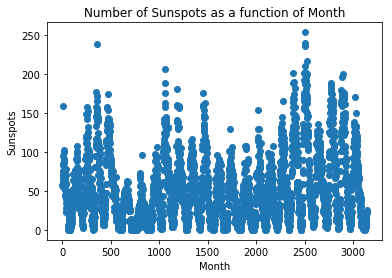

In [140]:
import numpy as np
everything = np.loadtxt('sunspots.txt', usecols=[0,1])
sunspots = everything.T
month = sunspots[0]
nr_sunsp = sunspots[1]
print('Number of Data points in month: ',len(month))
print('Number of Data points in nr_sunsp: ',len(nr_sunsp))
plt.scatter(month, nr_sunsp)
plt.title('Number of Sunspots as a function of Month')
plt.xlabel('Month')
plt.ylabel('Sunspots')

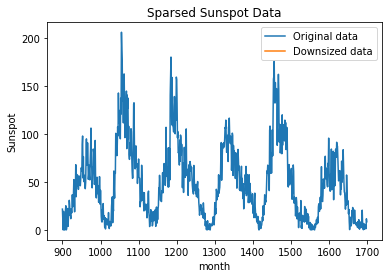

In [2]:
month_sparse = []
nr_sunsp_sparse = []
for i in range(len(month)):
    if i == 0:
        month_sparse.append(month[i])
        nr_sunsp_sparse.append(nr_sunsp[i])
    elif i%15 == 0:
        month_sparse.append(month[i])
        nr_sunsp_sparse.append(nr_sunsp[i])
plt.plot(month[900:1700], nr_sunsp[900:1700], label = 'Original data')
plt.plot(month_sparse[900:1700], nr_sunsp_sparse[900:1700], label = 'Downsized data' )
plt.title("Sparsed Sunspot Data")
plt.xlabel('month')
plt.ylabel('Sunspot')
plt.legend()

### 1.2
Plot a histogram of the number of all sunspots with 10 bins. This shows the number times the measured number of sunspots is in each of the 10 sunspot number bins. Extract the data points of the distribution function and overplot with single dots. Make sure that these dots are properly centered for each bin.

[ 1101.   713.   534.   339.   211.   130.    81.    27.     3.     4.]


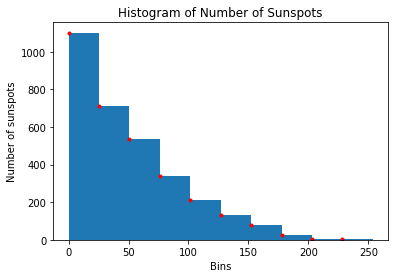

In [113]:
plt.title("Histogram of Number of Sunspots")
plt.xlabel('Bins')
plt.ylabel('Number of sunspots')
counts, bins, bars = plt.hist(nr_sunsp, 10)
print(counts)
for i in range(len(counts)):
    plt.plot(bins[i], counts[i], 'r.')

### 1.3
Fit the sunspot distribution function. Perform a least-square fit of an exponential with three parameters
$$
P_\mathrm{spots}(x) = a e^{bx} +c
$$
where $x=N_\mathrm{spots}$ is the number of sunspots measured.

Plot the distribution function data and fit together. Round the fit parameters appropriately and write your final fit formula in a Markdown cell. 

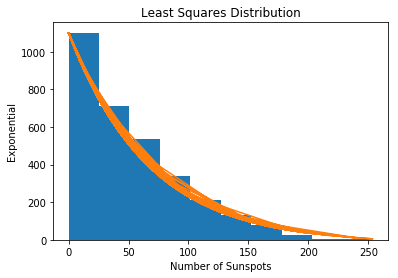

In [139]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize as optimization
def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(-b * x) + c
x = nr_sunsp
y = f(x, a=1121, b=0.015, c=-20) ##made guesses with the parameters
plt.axes
counts, bins, bars = plt.hist(nr_sunsp, 10)
plt.plot(x,  y)
plt.title('Least Squares Distribution')
plt.xlabel('Number of Sunspots')
plt.ylabel('Exponential')

Answer is roughly P = 1121*e^(0.015x)-20

## Problem 2

### 2.1
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ Taylor polynomial for the function $y(x) = sin(x^2)$, centred at $x_0 = 0$, i.e. $T_k(x) = \sum_{i=0}^k\frac{d^i y}{dx^i}(x=0)  \frac{x^i}{i!}$.  Print the output using a Sympy *pprint* command, for $k=2,6,10,14,15$.

### 2.2
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ polynomial *best fit* to $y(x) = sin(x^2)$ on the interval $[0,2\pi]$, using the least-squares technique. As in part 2.1, output your answers for $k=2,6,10,14,15$.

### 2.3
Write a function that takes as input a positive integer $k$.  Plot the function $y(x)=sin(x^2)$, together with the corresponding function from 2.1 and 2.2.  Include a legend.  For your $x$-bounds use the interval $[0, 2\pi]$, for the $y$-bounds use $[-1.2,1.2]$. Label your axis and give your plot an appropriate title (depending on $k$).  Include the plot for $k=10$ in your notebook. 

In [131]:
#2.1
import sympy as sy
import numpy as np
from sympy.functions import sin, cos, ln
import matplotlib.pyplot as plt

def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n - 1)
x = sy.Symbol('x')
def taylor(function, x0, n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*(x - x0)**i
        i += 1
        print(p)
        
a = taylor(sin(x**2), 0, 2)
sy.pprint(a)
sy.pprint(taylor(sin(x**2), 0, 6)) #Take only the last value of each k
sy.pprint(taylor(sin(x**2), 0, 10))
sy.pprint(taylor(sin(x**2), 0, 14))
sy.pprint(taylor(sin(x**2), 0, 15))

0
0
x**2
None
0
0
x**2
x**2
x**2
x**2
-x**6/6 + x**2
None
0
0
x**2
x**2
x**2
x**2
-x**6/6 + x**2
-x**6/6 + x**2
-x**6/6 + x**2
-x**6/6 + x**2
x**10/120 - x**6/6 + x**2
None
0
0
x**2
x**2
x**2
x**2
-x**6/6 + x**2
-x**6/6 + x**2
-x**6/6 + x**2
-x**6/6 + x**2
x**10/120 - x**6/6 + x**2
x**10/120 - x**6/6 + x**2
x**10/120 - x**6/6 + x**2
x**10/120 - x**6/6 + x**2
-x**14/5040 + x**10/120 - x**6/6 + x**2
None
0
0
x**2
x**2
x**2
x**2
-x**6/6 + x**2
-x**6/6 + x**2
-x**6/6 + x**2
-x**6/6 + x**2
x**10/120 - x**6/6 + x**2
x**10/120 - x**6/6 + x**2
x**10/120 - x**6/6 + x**2
x**10/120 - x**6/6 + x**2
-x**14/5040 + x**10/120 - x**6/6 + x**2
-x**14/5040 + x**10/120 - x**6/6 + x**2
None


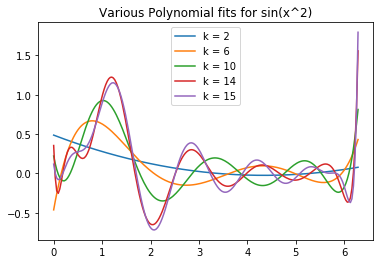

In [138]:
#2.2
x = np.linspace(0, 2*np.pi, 200)
y = []
for i in range(200):
    y.append(sin((x[i])**2))


def poly_fit(func, k):
    poly = np.polyfit(x, func, k)
    return poly
k_2 = poly_fit(y, 2)
plt.plot(x, (k_2[0])*x**2+k_2[1]*x+k_2[2], label = 'k = 2')
k_6 = poly_fit(y, 6)
plt.plot(x, k_6[0]*x**6+k_6[1]*x**5+k_6[2]*x**4+k_6[3]*x**3+k_6[4]*x**2+k_6[5]*x+k_6[6], label = 'k = 6')
k_10 = poly_fit(y, 10)
plt.plot(x, k_10[0]*x**10+k_10[1]*x**9+k_10[2]*x**8+k_10[3]*x**7+k_10[4]*x**6+k_10[5]*x**5
         +k_10[6]*x**4+k_10[7]*x**3+k_10[8]*x**2+k_10[9]*x+k_10[10], label = 'k = 10')
k_14 = poly_fit(y, 14)
plt.plot(x, k_14[0]*x**14+k_14[1]*x**13+k_14[2]*x**12+k_14[3]*x**11+k_14[4]*x**10+k_14[5]*x**9
         +k_14[6]*x**8+k_14[7]*x**7+k_14[8]*x**6+k_14[9]*x**5+k_14[10]*x**4+k_14[11]*x**3+k_14[12]*x**2+k_14[13]*x
         +k_14[14], label = 'k = 14')
k_15 = poly_fit(y, 15)
plt.plot(x, k_15[0]*x**15+k_15[1]*x**14+k_15[2]*x**13+k_15[3]*x**12+k_15[4]*x**11+k_15[5]*x**10
         +k_15[6]*x**9+k_15[7]*x**8+k_15[8]*x**7+k_15[9]*x**6+k_15[10]*x**5+k_15[11]*x**4+k_15[12]*x**3+k_15[13]*x**2
         +k_15[14]*x+k_15[15], label = 'k = 15')

plt.title("Various Polynomial fits for sin(x^2)")
plt.legend()

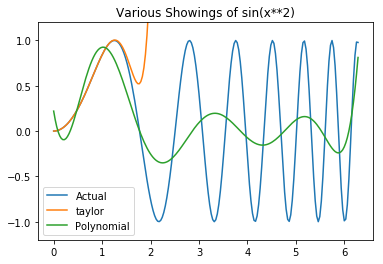

In [141]:
#2.3
ylim = [-1.2, 1.2]
x = np.linspace(0, 2*np.pi, 200)
y = []
for i in range(200):
    y.append(sin((x[i])**2))
plt.plot(x, y, label = "Actual")
plt.plot(x, x**2-(1/6)*x**6+(1/120)*x**10, label = "taylor")
plt.ylim(-1.2, 1.2)
plt.plot(x, k_10[0]*x**10+k_10[1]*x**9+k_10[2]*x**8+k_10[3]*x**7+k_10[4]*x**6+k_10[5]*x**5
         +k_10[6]*x**4+k_10[7]*x**3+k_10[8]*x**2+k_10[9]*x+k_10[10], label = "Polynomial")
plt.legend()
plt.title("Various Showings of sin(x**2)")

## Problem 3

The _Belousov-Zhabotinsky reaction_ is a chemcial oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. The following equations describe the evolution of the two concentrations in this chemical system:
$$
\frac{dx}{dt} = 1-(b+1)x+ax^2y\\
\frac{dy}{dt} = bx -ax^2y
$$
where $x$ and $y$ represent concentrations of two chemicals and $a$ and  $b$ are positive constants. 

Solve these equations (numerically) for $a=1$, $b=3$ with initial conditions $x=y=0$ and plot the solution. 

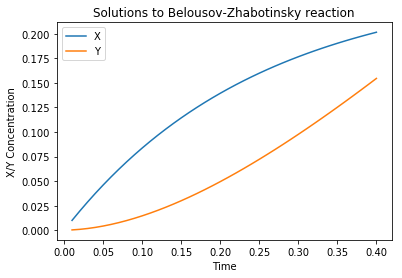

In [58]:
dt = 0.01
X = []
Y = []
t = 0
time = []
def bel_Zha(x, y, a, b):
    t = 0
    while x <0.2:
        x = x + (1-(b+1)*x+a*x**2*y)*dt
        y = y + (b*x-a*x**2*y)*dt
        X.append(x)
        Y.append(y)
        t+=dt
        time.append(t)
bel_Zha(0,0,1,3)
plt.title("Solutions to Belousov-Zhabotinsky reaction")
plt.xlabel("Time")
plt.ylabel("X/Y Concentration")
plt.plot(time,X, label = 'X')
plt.plot(time, Y, label = 'Y')
plt.legend()


# Problem 4

In the `data` directory there is the text file `wdats.txt`. Copy this file into your `mp248/final` directory.   Each line of the file has a day of data for Victoria and Saskatoon.  The top line of the file explains the content of the remaining lines in the file.   In this problem we ask you to make a matplotlib interactive visualization of the data.

Use matplotlib `widgets` to control your interactive plot. Use a <a href="https://matplotlib.org/gallery/widgets/slider_demo.html">Slider</a> for the user to input the month as a number between 1 (January) and 12 (December).  Also have a <a href="https://matplotlib.org/gallery/widgets/radio_buttons.html">RadioButton</a> for the user to select between max, min and mean temperatures.

With the application running, when the user selects the month, and clicks on a radio button, the plot should update to show the temperatures for Victoria (horizontal axis) vs Saskatoon (vertical axis) for that month and with the convention chosen on the radio button.

This should be a properly interactive plot, that allows the user to dynamically change the month and radio button, with the plot automatically updating on every change.

If you find using the Slider or RadioButton feature difficult; rather than making an interactive plot, you could opt to make a callable function that takes two arguments: (1) the month as an integer between 1 and 12, and (2) a string 'Max', 'Min' or 'Mean'.  This function should then make the appropriate non-interactive Matplotlib plot, as described above.  Such an answer would receive (at best) a grade of 7/10.


In [133]:
everything = np.loadtxt('wdats.txt', delimiter = ',', skiprows = 1, usecols = [1, 2, 3, 4,5,6,7,8]) 
##Couldn't get the date to work... 
dates = everything.T
Min_Vic, Mean_Vic, Max_Vic, Precip_Vic, Min_Sask,Mean_Sask, Max_Sask, Precip_Sask = dates

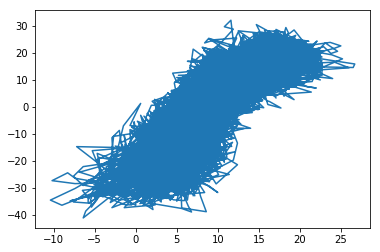

In [134]:
plt.plot(Mean_Vic, Mean_Sask)

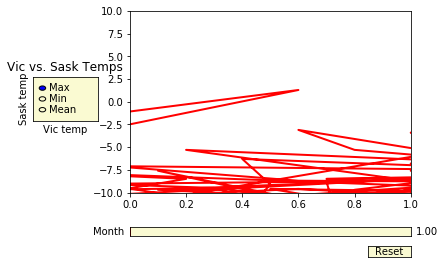

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = Mean_Sask
f0 = 1
s = Mean_Vic
l, = plt.plot(s, t, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Month', 1, 12, valinit=f0, dragging = True)



def update(val):
    freq = sfreq.val
    l.set_ydata(Mean_Sask[freq])
    fig.canvas.draw_idle()
sfreq.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('Max', 'Min', 'Mean'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)
##Checked on other files in physmath248 and my interactive plot wasn't working for some reason.  It said the cell 
##executed yet no plot showed... 
plt.title("Vic vs. Sask Temps")
plt.xlabel("Vic temp")
plt.ylabel('Sask temp')
plt.show()